In [86]:
import pandas as pd
import numpy as np 
import os
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
os.getcwd()
os.chdir('/Users/Jeffrey.Lu@ibm.com/Desktop')

In [88]:
#Importing Ad Size 1 data
df = pd.read_csv('Viewability Ad Size 1.csv')

In [89]:
df_before = df.iloc[:40]

In [90]:
df_after = df.iloc[40:]

In [91]:
#Formatting percentages to float type
df_before['In-View Rate'] = df_before['In-View Rate'].str.replace('%',"").astype('float')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [92]:
df_after['In-View Rate'] = df_after['In-View Rate'].str.replace('%',"").astype('float')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
#Checking for outliers
df_before['In-View Rate Before'] = df_before['In-View Rate']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [94]:
df_after['In-View Rate After'] = df_after['In-View Rate']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
df_merge = pd.DataFrame(df_before['In-View Rate Before'])

In [96]:
df_merge['In-View Rate After'] = list(df_after['In-View Rate After'])

In [97]:
df_merge.head()

,In-View Rate Before,In-View Rate After
0,85.60,77.27
1,83.87,78.46
2,83.89,77.70
3,84.11,76.86
4,85.05,76.59


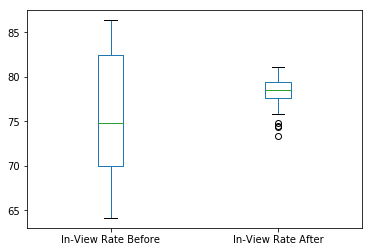

In [98]:
#Checking for significant outliers
df_merge[['In-View Rate Before', 'In-View Rate After']].plot(kind='box')

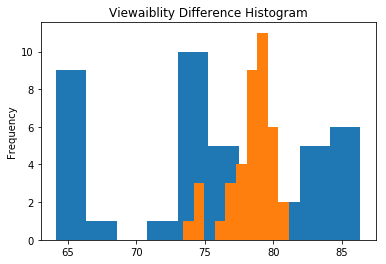

In [99]:
#Histogram normality check 

df_merge['In-View Rate Before'].plot(kind='hist', title= 'Viewaiblity Difference Histogram')

df_merge['In-View Rate After'].plot(kind='hist', title= 'Viewaiblity Difference Histogram')

((array([-2.11583547, -1.7314906 , -1.50271646, -1.33321868, -1.19520249,
         -1.07683093, -0.97189321, -0.87669641, -0.78885043, -0.70670905,
         -0.62908229, -0.55507545, -0.48399287, -0.41527745, -0.34847074,
         -0.28318561, -0.2190868 , -0.15587657, -0.09328369, -0.03105452,
          0.03105452,  0.09328369,  0.15587657,  0.2190868 ,  0.28318561,
          0.34847074,  0.41527745,  0.48399287,  0.55507545,  0.62908229,
          0.70670905,  0.78885043,  0.87669641,  0.97189321,  1.07683093,
          1.19520249,  1.33321868,  1.50271646,  1.7314906 ,  2.11583547]),
  array([73.41, 74.34, 74.43, 74.82, 75.81, 76.59, 76.86, 77.27, 77.31,
         77.42, 77.7 , 77.97, 78.09, 78.11, 78.22, 78.26, 78.38, 78.39,
         78.46, 78.46, 78.47, 78.97, 78.98, 79.13, 79.23, 79.26, 79.28,
         79.34, 79.45, 79.46, 79.49, 79.51, 79.65, 79.7 , 79.84, 79.91,
         80.02, 80.13, 80.94, 81.15])),
 (1.73805306586437, 78.30525, 0.9508678427393935))

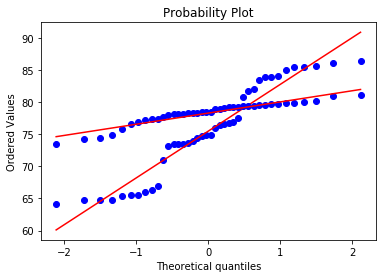

In [100]:
#QQ-Plot normality check

stats.probplot(df_merge['In-View Rate Before'], plot= plt)

stats.probplot(df_merge['In-View Rate After'], plot= plt)

In [154]:
#Welch's T-test was used to test differences between means between the two series with unequal vairances
result_welch1 = stats.ttest_ind(df_merge['In-View Rate Before'], df_merge['In-View Rate After'], equal_var = False)
result_welch1

Ttest_indResult(statistic=-2.359381633521662, pvalue=0.022854638797328988)

In [155]:
#Welch's T-test interpretation
if result_welch1[1]>0.05:
    print('Viewability Percentages for ads before and after the 30 second refresh implementation are not statistically different.')
else:
    print('Viewability Percentages before and after the 30 second ad-refresh implementation are significantly different at a 95% significance level.')

Viewability Percentages before and after 30 second ad-refresh implementation are significantly different at a 95% significance level.


In [156]:
#Wilcoxon Signed-Rank Test (one-sided-"Less") was used to test if the median value is significantly different pre vs. post refresh implementation
result_wilcoxon1 = scipy.stats.wilcoxon(df_merge['In-View Rate Before'], df_merge['In-View Rate After'], alternative = 'less')
result_wilcoxon1

WilcoxonResult(statistic=275.0, pvalue=0.034794613137737025)

In [161]:
#Wilcoxon Signed-Rank Test interpretation
if result_wilcoxon[1]>0.05:
    print('Viewability Percentages for pre 30 second refresh ads are statistically similar to post 30 second refresh ads.')
else:
    print('Viewability Percentages for pre 30 second refresh ads are statistically lower than post 30 second refresh ads.')


Viewability Percentages for pre 30 second refresh ads are statistically lower than post 30 second refresh ads.


In [135]:
#Importing Ad Size 2 data
df2 = pd.read_csv('Viewability Ad Size 2.csv')

In [136]:
df_before2 = df2.iloc[:40]

In [137]:
df_after2 = df2.iloc[40:]

In [138]:
#Formatting Percent to float type
df_before2['In-View Rate'] = df_before2['In-View Rate'].str.replace('%',"").astype('float')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [139]:
df_after2['In-View Rate'] = df_after2['In-View Rate'].str.replace('%',"").astype('float')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [140]:
#Checking for outliers
df_before2['In-View Rate Before'] = df_before2['In-View Rate']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [141]:
df_after2['In-View Rate After'] = df_after2['In-View Rate']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [142]:
df_merge2 = pd.DataFrame(df_before2['In-View Rate Before'])

In [143]:
df_merge2['In-View Rate After'] = list(df_after2['In-View Rate After'])

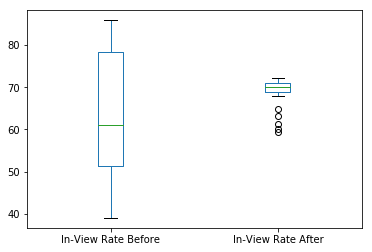

In [144]:
#Checking for significant outliers
df_merge2[['In-View Rate Before', 'In-View Rate After']].plot(kind='box')

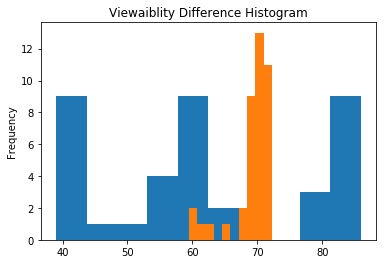

In [145]:
#histogram normality check

df_merge2['In-View Rate Before'].plot(kind='hist', title= 'Viewaiblity Difference Histogram')

df_merge2['In-View Rate After'].plot(kind='hist', title= 'Viewaiblity Difference Histogram')


((array([-2.11583547, -1.7314906 , -1.50271646, -1.33321868, -1.19520249,
         -1.07683093, -0.97189321, -0.87669641, -0.78885043, -0.70670905,
         -0.62908229, -0.55507545, -0.48399287, -0.41527745, -0.34847074,
         -0.28318561, -0.2190868 , -0.15587657, -0.09328369, -0.03105452,
          0.03105452,  0.09328369,  0.15587657,  0.2190868 ,  0.28318561,
          0.34847074,  0.41527745,  0.48399287,  0.55507545,  0.62908229,
          0.70670905,  0.78885043,  0.87669641,  0.97189321,  1.07683093,
          1.19520249,  1.33321868,  1.50271646,  1.7314906 ,  2.11583547]),
  array([59.4 , 60.05, 61.17, 63.23, 64.94, 67.82, 68.32, 68.47, 68.55,
         68.63, 69.11, 69.22, 69.49, 69.59, 69.62, 69.65, 69.82, 69.86,
         69.91, 69.92, 70.02, 70.36, 70.37, 70.41, 70.46, 70.53, 70.66,
         70.81, 70.96, 71.01, 71.12, 71.14, 71.43, 71.47, 71.52, 71.68,
         71.77, 71.94, 71.95, 72.27])),
 (2.7540313262749483, 69.21624999999999, 0.8509289365169105))

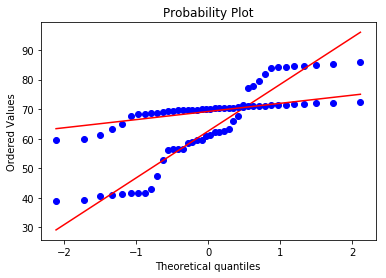

In [146]:
#QQ-Plot normality check although it has been mentioned that normality can be assumed when n >= 30

stats.probplot(df_merge2['In-View Rate Before'], plot= plt)

stats.probplot(df_merge2['In-View Rate After'], plot= plt)


In [157]:
#Welch's T-test was used to test differences between means between the two series since the two series suggests unequal variances
result_welch2 = stats.ttest_ind(df_merge2['In-View Rate Before'], df_merge2['In-View Rate After'], equal_var = False)
result_welch2

Ttest_indResult(statistic=-2.5835360054731313, pvalue=0.013348979852348439)

In [163]:
#Welch's T-test interpretation
if result_welch2[1]>0.05:
    print('Viewability Percentages for ads before and after the 30 second refresh implementation are not statistically different.')
else:
    print('Viewability Percentages before and after the 30 second ad-refresh implementation are significantly different at a 95% significance level.')
    

Viewability Percentages before and after the 30 second ad-refresh implementation are significantly different at a 95% significance level.


In [159]:
#Wilcoxon Signed-Rank Test (one-sided-"Less") was used to test if the median value is significantly different pre vs. post refresh since one series does not show a normal distribution
result_wilcoxon2 = scipy.stats.wilcoxon(df_merge2['In-View Rate Before'], df_merge2['In-View Rate After'], alternative = 'less')
result_wilcoxon2

WilcoxonResult(statistic=253.0, pvalue=0.017416964334850762)

In [162]:
#Wilcoxon Signed-Rank Test interpretation
if result_wilcoxon2[1]>0.05:
    print('Viewability Percentages for pre 30 second refresh ads are statistically similar to post 30 second refresh ads.')
else:
    print('Viewability Percentages for pre 30 second refresh ads are statistically lower than post 30 second refresh ads.')



Viewability Percentages for pre 30 second refresh ads are statistically lower than post 30 second refresh ads.
